# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [70]:
# Checking the number of mice.
mice_count = combined_data_df["Mouse ID"].nunique()
mice_count

249

In [114]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = combined_data_df.loc[combined_data_df.duplicated(subset = ["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
print(f"Duplicate Mice ID: {duplicate_ID}")

Duplicate Mice ID: ['g989']


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ID = combined_data_df[combined_data_df.duplicated(["Mouse ID", "Timepoint",])]
duplicate_mice_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_df1 = combined_data_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
combined_data_df1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [81]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = len(combined_data_df1["Mouse ID"].unique())
new_mice_count

249

## Summary Statistics

In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = combined_data_df1.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean

median = combined_data_df1.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
median

variance = combined_data_df1.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
variance

stdev = combined_data_df1.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
stdev

sem = combined_data_df1.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
sem

# Assemble the resulting series into a single summary DataFrame.
stat_summary1 = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, 
                               "Standard Deviation": stdev, "SEM": sem})
stat_summary1

/var/folders/p1/dq82670s7m3_n6slwk8wznt40000gn/T/ipykernel_19910/1039040774.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = combined_data_df1.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
/var/folders/p1/dq82670s7m3_n6slwk8wznt40000gn/T/ipykernel_19910/1039040774.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median = combined_data_df1.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
/var/folders/p1/dq82670s7m3_n6slwk8wznt40000gn/T/ipykernel_19910/1039040774.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, nume

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stat_summary2 = combined_data_df1.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
stat_summary2

/var/folders/p1/dq82670s7m3_n6slwk8wznt40000gn/T/ipykernel_19910/3451082108.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  stat_summary2 = combined_data_df1.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

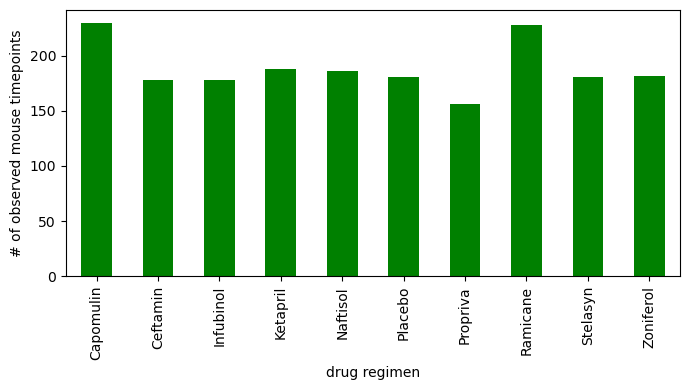

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_per_treatment = combined_data_df1.groupby(["Drug Regimen"]).count()["Mouse ID"] 
pandas_plot = count_per_treatment.plot.bar(figsize = (7,4), color = 'g',fontsize = 10)
plt.xlabel("drug regimen",fontsize = 10)
plt.ylabel("# of observed mouse timepoints",fontsize = 10)
plt.tight_layout()
plt.show()

count_per_treatment

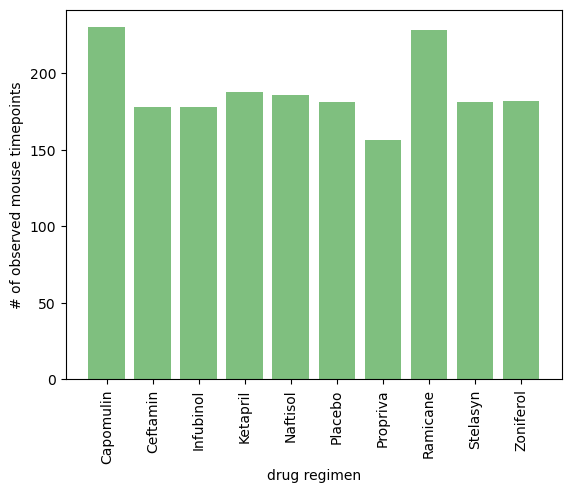

In [79]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
treatment_count = (combined_data_df1.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
treatment_count
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, count_per_treatment.index,rotation = "vertical")
plt.bar(x_axis, count_per_treatment, color = 'g', alpha=0.5, align = "center")
plt.xlabel("drug regimen")
plt.ylabel("# of observed mouse timepoints")
plt.show()

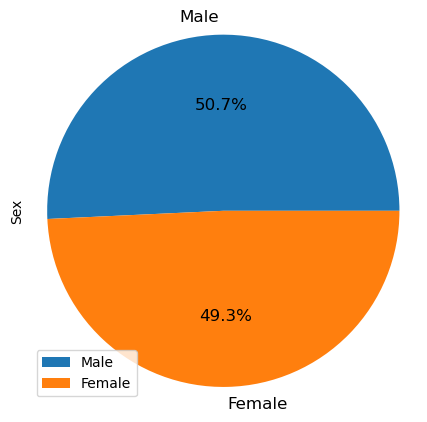

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = combined_data_df1["Sex"].value_counts()
mice_sex_df = mice_sex.to_frame()
mice_sex_plot = mice_sex_df.plot(kind = "pie", y ='Sex', autopct = "%1.1f%%", fontsize = 12, figsize = (5, 5))
plt.axis("equal")
plt.show()

([<matplotlib.patches.Wedge at 0x7f859bfc9450>,
 [Text(-0.6872462450269542, -0.8588903298421469, 'Male'),
  Text(0.6872463254420675, 0.8588902654975058, 'Female')],
 [Text(-0.37486158819652043, -0.46848563445935276, '50.7%'),
  Text(0.3748616320593095, 0.46848559936227585, '49.3%')])

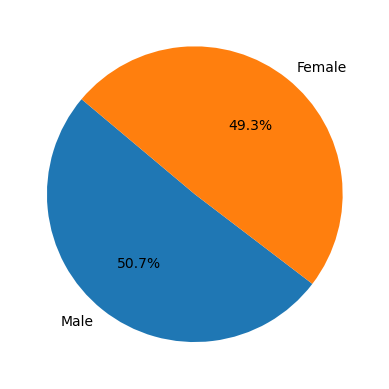

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
plt.pie(mice_sex, labels = labels, autopct = "%1.1f%%", startangle = 140)

## Quartiles, Outliers and Boxplots

In [105]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
last_time = combined_data_df1.groupby("Mouse ID")
last_time = last_time["Timepoint"].max()
last_time_df = pd.DataFrame(last_time)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumorvol_df = pd.merge(last_time_df, combined_data_df1, on = ["Mouse ID", "Timepoint"])
tumorvol_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [115]:

# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
cap_tumorvol = []
ram_tumorvol = []
inf_tumorvol = []
cef_tumorvol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in range(len(tumorvol_df)-1):
    if tumorvol_df.loc[x, "Drug Regimen"] == "Capomulin":
        cap_tumorvol.append(tumorvol_df.loc[x, "Tumor Volume (mm3)"])
    if tumorvol_df.loc[x, "Drug Regimen"] == "Ramicane":
        ram_tumorvol.append(tumorvol_df.loc[x, "Tumor Volume (mm3)"])
    if tumorvol_df.loc[x, "Drug Regimen"] == "Infubinol":
        inf_tumorvol.append(tumorvol_df.loc[x, "Tumor Volume (mm3)"])
    if tumorvol_df.loc[x, "Drug Regimen"] == "Ceftamin":
        cef_tumorvol.append(tumorvol_df.loc[x, "Tumor Volume (mm3)"])

tumor_volume = [cap_tumorvol, ram_tumorvol, inf_tumorvol, cef_tumorvol]
for x in range(len(tumor_volume)):
    quartiles = pd.Series(tumor_volume[x]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\n{treatment[x]}:")

    print(f"the lower quartile of tumor volume is: {lowerq}")
    print(f"the upper quartile of tumor volume is: {upperq}")
    print(f"the interquartile range of tumor volume is: {iqr}")
    print(f"the the median of tumor volume is: {quartiles[0.5]}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"values below {lower_bound} could be outliers.")
    print(f"values above {upper_bound} could be outliers.")
      
for y in range(len(tumor_volume[x])):
    if (tumor_volume[x][y] < lower_bound) or (tumor_volume[x][y] > upper_bound):
        the_outlier = tumor_volume[x][y]
        outlier.append(the_outlier)
        print(f"the outliers are {outlier}.")





Capomulin:
the lower quartile of tumor volume is: 32.37735684
the upper quartile of tumor volume is: 40.1592203
the interquartile range of tumor volume is: 7.781863460000004
the the median of tumor volume is: 38.1251644
values below 20.70456164999999 could be outliers.
values above 51.83201549 could be outliers.

Ramicane:
the lower quartile of tumor volume is: 31.56046955
the upper quartile of tumor volume is: 40.65900627
the interquartile range of tumor volume is: 9.098536719999998
the the median of tumor volume is: 36.56165229
values below 17.912664470000003 could be outliers.
values above 54.30681135 could be outliers.

Infubinol:
the lower quartile of tumor volume is: 54.04860769
the upper quartile of tumor volume is: 65.52574285
the interquartile range of tumor volume is: 11.477135160000003
the the median of tumor volume is: 60.16518046
values below 36.83290494999999 could be outliers.
values above 82.74144559000001 could be outliers.

Ceftamin:
the lower quartile of tumor volum

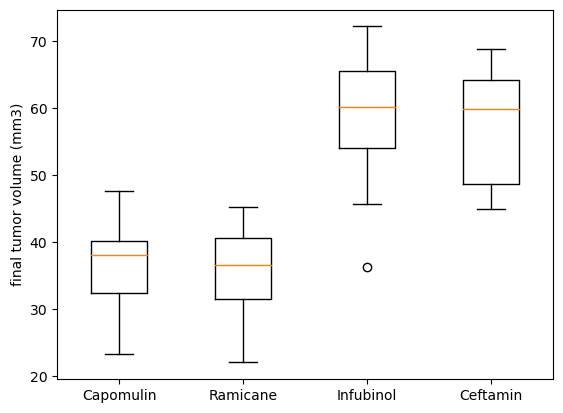

In [116]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("final tumor volume (mm3)")
ax1.boxplot(tumor_volume)
ax1.set_xticklabels(treatment)
plt.show()


## Line and Scatter Plots

In [117]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
tumorvol_df.loc[tumorvol_df["Drug Regimen"] == "Capomulin"].head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2


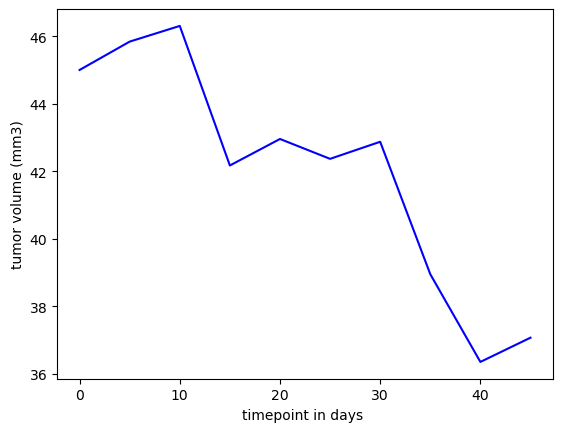

In [125]:
tumor_g288 = combined_data_df.loc[combined_data_df["Mouse ID"]=="g288"]

plt.plot(tumor_g288["Timepoint"],tumor_g288["Tumor Volume (mm3)"], color = "blue")
plt.xlabel("timepoint in days ")
plt.ylabel("tumor volume (mm3)")
plt.show()

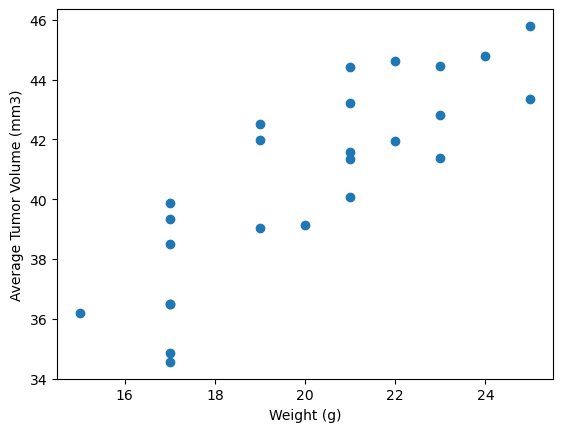

In [126]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")
cap_tumor_average = cap_df["Tumor Volume (mm3)"].mean()
mouse_weight = cap_df["Weight (g)"].unique()
plt.scatter(mouse_weight, cap_tumor_average)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

correlation between mouse weight and the average volume of capomulin tumor is 0.84.


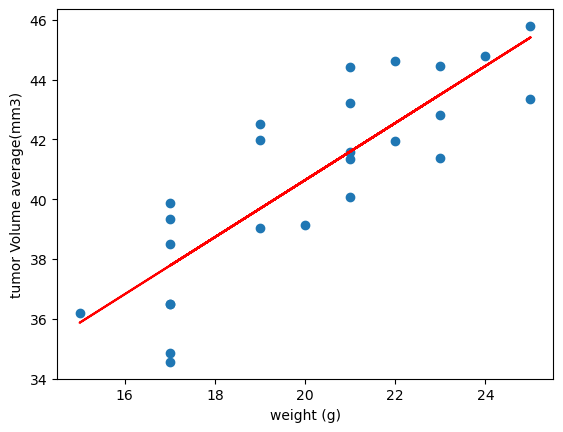

In [127]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, cap_tumor_average)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, cap_tumor_average)
regression_value = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, cap_tumor_average)
plt.plot(mouse_weight,regression_value,"r-")
plt.xlabel("weight (g)")
plt.ylabel("tumor Volume average(mm3)")
print(f"correlation between mouse weight and the average volume of capomulin tumor is {round(correlation[0], 2)}.")
plt.show()